In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
url = "https://www.gutenberg.org/cache/epub/58221/pg58221-images.html"
contenido = requests.get(url).text

In [3]:
soup = BeautifulSoup(contenido, "html.parser")

In [4]:
parrafos = soup.find_all("p")

In [5]:
print(parrafos)

[<p><strong>Title</strong>: La Odisea</p>, <p><strong>Author</strong>: Homer</p>, <p><strong>Illustrator</strong>: John Flaxman</p>, <p style="margin-top:0"> <span style="padding-left: 7.5ex"></span>Walter Paget</p>, <p><strong>Translator</strong>: Luis Segalá y Estalella</p>, <p><strong>Release date</strong>: November 2, 2018 [eBook #58221]<br/>
                Most recently updated: September 13, 2025</p>, <p><strong>Language</strong>: Spanish</p>, <p><strong>Credits</strong>: Produced by Ramon Pajares Box, Carlos Colon, and the Online<br/>
        Distributed Proofreading Team at http://www.pgdp.net</p>, <p><a class="pginternal" href="#tnote">Nota de transcripción</a></p>, <p><a class="pginternal" href="#Index">Índice de nombres propios</a></p>, <p><a class="pginternal" href="#ToI">Índice de grabados</a></p>, <p><a class="pginternal" href="#ToC">Índice general</a></p>, <p><a class="pginternal" href="#notas">Notas al prólogo</a></p>, <p><span class="pagenum" id="Page_1">[p. 1]</span>

In [6]:
h1 = soup.find_all("h1")

In [7]:
print(h1)

[<h1 class="g1 ws1">LA ODISEA</h1>]


In [8]:
italicas = soup.find_all("i")

In [9]:
from collections import Counter

In [10]:
parrafos = str(soup.find_all("p"))

In [12]:
print(parrafos.count("Ulises"))
print(parrafos.count("Ciclope"))
print(parrafos.count("Minerva"))

1662
65
366


In [14]:
def buscar_palabra(palabra): # Funcion para buscar palabras
  ocurrencias = str(soup).lower().count(palabra.lower())
  print(f"Encontraste la palabra '{palabra}' {ocurrencias} veces")

In [16]:
buscar_palabra("Ciclope")
buscar_palabra("Minerva")
buscar_palabra("Alcínoo")
buscar_palabra("CANTO")
buscar_palabra("Ulises")

Encontraste la palabra 'Ciclope' 82 veces
Encontraste la palabra 'Minerva' 376 veces
Encontraste la palabra 'Alcínoo' 130 veces
Encontraste la palabra 'CANTO' 114 veces
Encontraste la palabra 'Ulises' 1708 veces


## Algo divertido

In [17]:
import random

In [18]:
# 2. Mostrar un pasaje aleatorio de la Odisea
parrafos = soup.find_all("p")
parrafo_aleatorio = random.choice(parrafos).text.strip()

In [19]:
print("\nLee un pasaje aleatorio de la Odisea")
print("-------------------------------------------")
print(parrafo_aleatorio)
print("-------------------------------------------")
print(f"Este párrafo tiene {len(parrafo_aleatorio.split())} palabras.")


Lee un pasaje aleatorio de la Odisea
-------------------------------------------
Ceres (Δημήτηρ): Diosa, hija de Saturno y de Rea.
Cediendo á su amor por[p. 342]
Yasión, ayuntóse con él en un campo noval; y Júpiter mató al héroe con el ardiente rayo,
V, 125 á 128.
-------------------------------------------
Este párrafo tiene 36 palabras.


## Visualizaciones interesantes


In [20]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image
import nltk
from nltk.corpus import stopwords
import re

In [21]:
import matplotlib.pyplot as plt

In [22]:
# Descarga las stopwords en español
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [23]:
# Función para limpiar y tokenizar el texto

def limpiar_texto(texto):
    # 1. Preparar el texto
    # Convertir todo a minúsculas
    texto_minusculas = texto.lower()

    # 2. Eliminar signos de puntuación
    # [^\w\s] significa: eliminar todo lo que no sea letra, número o espacio
    texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minusculas)

    # 3. Dividir el texto en palabras individuales
    lista_palabras = texto_sin_puntuacion.split()

    # 4. Crear lista para almacenar palabras importantes
    palabras_importantes = []

    # 5. Revisar cada palabra y guardar solo las que no son palabras comunes
    for palabra in lista_palabras:
        if palabra not in stop_words:  # stop_words contiene palabras como "el", "la", "y", etc.
            palabras_importantes.append(palabra)

    return palabras_importantes

# Obtener el texto completo de la página web
texto_completo = soup.get_text()

# Limpiar el texto y obtener lista de palabras importantes
palabras_limpias = limpiar_texto(texto_completo)

# Unir todas las palabras importantes en un solo texto, separadas por espacios
texto_limpio = ' '.join(palabras_limpias)

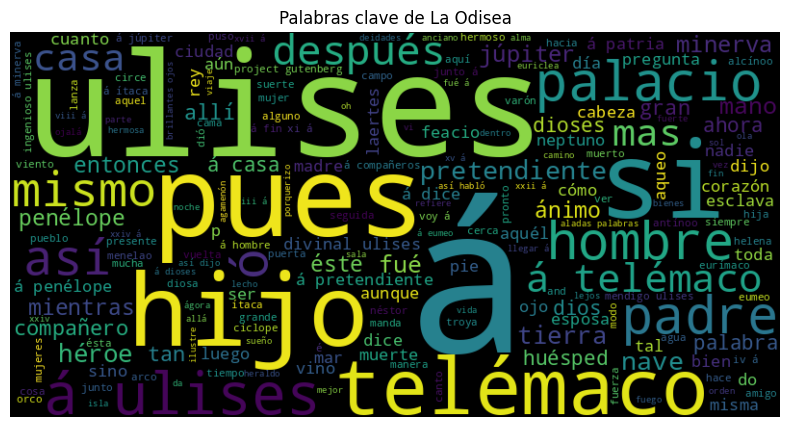

In [24]:
# 4. Nube de palabras mejorada con la forma de un barco griego
wordcloud = WordCloud(width=800, height=400,
                      background_color='black',
                      stopwords=stop_words,
                      contour_width=3,
                      contour_color='steelblue').generate(texto_limpio)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras clave de La Odisea')
plt.show()

In [25]:
def limpiar_texto(texto):
    # 1. Definir palabras adicionales a eliminar
    palabras_a_eliminar = {
        'dijo', 'así', 'aunque', 'sino', 'luego', 'pues', 'mientras',
        'después', 'antes', 'porque', 'cuando', 'cómo', 'donde', 'cap',
        'capítulo', 'verso', 'canto', 'á'  # Añade aquí las palabras que quieras eliminar
    }

    # 2. Combinar stopwords con palabras adicionales a eliminar
    todas_palabras_a_eliminar = stop_words.union(palabras_a_eliminar)

    # 3. Preparar el texto
    texto_minusculas = texto.lower()
    texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minusculas)
    lista_palabras = texto_sin_puntuacion.split()

    # 4. Crear lista para palabras importantes
    palabras_importantes = []

    # 5. Revisar cada palabra
    for palabra in lista_palabras:
        # Guardar solo si no está en la lista de palabras a eliminar
        if palabra not in todas_palabras_a_eliminar:
            palabras_importantes.append(palabra)

    return palabras_importantes

# Obtener y limpiar el texto
texto_completo = soup.get_text()
palabras_limpias = limpiar_texto(texto_completo)
texto_limpio = ' '.join(palabras_limpias)

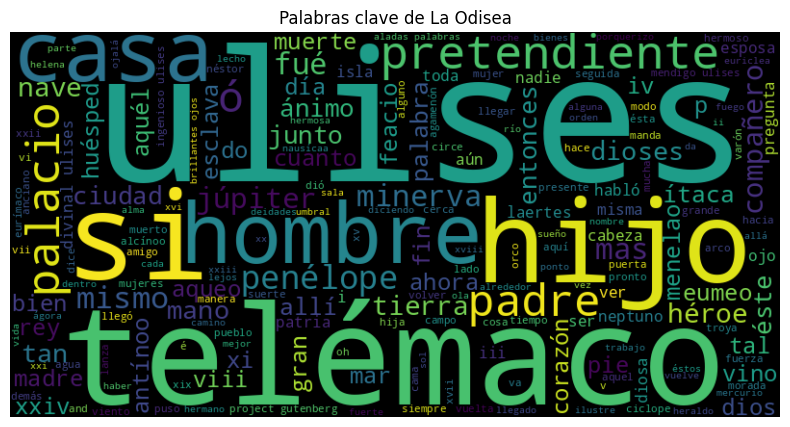

In [26]:
# 4. Nube de palabras mejorada con la forma de un barco griego
wordcloud = WordCloud(width=800, height=400,
                      background_color='black',
                      stopwords=stop_words,
                      contour_width=3,
                      contour_color='steelblue').generate(texto_limpio)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Palabras clave de La Odisea')
plt.show()